<a href="https://colab.research.google.com/github/abdulmoid7416/Cotton-Disease-Detection/blob/main/Python_Code(CottonDiseaseDetection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Sat Jun 12 04:44:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images
IMAGE_SIZE = [224, 224]

#Dataset stored in the Drive
train_path = '/content/drive/MyDrive/Cotton_plant Dataset/train'
valid_path = '/content/drive/MyDrive/Cotton_plant Dataset/test'

In [ ]:
#Resnet50 model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights; We will directly use the pre-trained weights from the ResNet, 
#So we dont have to train it, instead we will just train the last layers
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton_plant Dataset/train/*')

In [ ]:
# Adding our own layers - 
x = Flatten()(resnet.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# Use the Image Data Generator to import the images from the dataset, Also Augmenting Training Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_plant Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_plant Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:

# fit the model
f = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 490s 8s/step - loss: 2.4819 - accuracy: 0.4039 - val_loss: 1.6479 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 276s 5s/step - loss: 1.0226 - accuracy: 0.5782 - val_loss: 0.9120 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 268s 4s/step - loss: 0.9398 - accuracy: 0.6156 - val_loss: 0.8972 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 265s 4s/step - loss: 0.8838 - accuracy: 0.6479 - val_loss: 1.1535 - val_accuracy: 0.6667
Epoch 5/20
61/61 [==============================] - 273s 4s/step - loss: 1.1028 - accuracy: 0.6069 - val_loss: 1.2012 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 267s 4s/step - loss: 0.8366 - accuracy: 0.6709 - val_loss: 0.7609 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 272s 4s/step - loss: 0.8614 - accuracy: 0.6807 - val_loss: 0.6783 - val_accuracy: 0.7222
Epoch 8/20
61

In [ ]:
import matplotlib.pyplot as plt

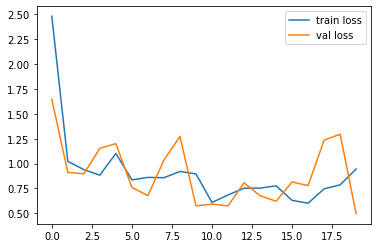

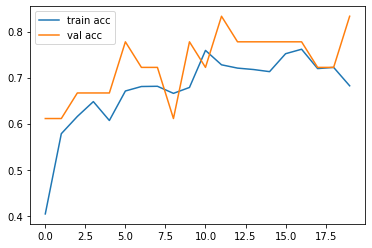

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(f.history['loss'], label='train loss')
plt.plot(f.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(f.history['accuracy'], label='train acc')
plt.plot(f.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# Download the model
from google.colab import files
files.download("model_resnet50.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[3.52340966e-01, 1.11316899e-02, 6.29495561e-01, 7.03180814e-03],
       [4.38456908e-02, 5.50378440e-03, 9.26312983e-01, 2.43376046e-02],
       [2.55541533e-01, 6.72616124e-01, 1.20121101e-02, 5.98302484e-02],
       [3.08262035e-02, 4.62290300e-05, 1.59152769e-04, 9.68968451e-01],
       [4.14544255e-01, 1.88880973e-02, 4.89755064e-01, 7.68125877e-02],
       [3.64940125e-03, 8.17786232e-02, 2.02959156e-04, 9.14369047e-01],
       [9.00852773e-03, 9.04809952e-01, 3.45365720e-06, 8.61781016e-02],
       [9.99300599e-01, 1.19503966e-07, 2.92950535e-05, 6.69915637e-04],
       [2.70469375e-02, 1.25986427e-01, 1.41962268e-03, 8.45547020e-01],
       [8.52711320e-01, 1.25936240e-01, 2.11920560e-04, 2.11405270e-02],
       [6.39679804e-02, 1.79257950e-05, 9.35993314e-01, 2.07206067e-05],
       [2.88578004e-01, 5.18919766e-01, 7.28367129e-04, 1.91773862e-01],
       [1.67102404e-02, 8.22012126e-01, 1.38540298e-03, 1.59892336e-01],
       [8.81579705e-03, 2.21256927e-01, 1.24684686e

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')


In [ ]:
# Grab an image from the test dataset.
img=image.load_img('/content/drive/MyDrive/Cotton_plant Dataset/val/diseased cotton leaf/dis_leaf (113)_iaip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[137., 127., 115.],
        [132., 122., 110.],
        [119., 109.,  97.],
        ...,
        [126., 119., 109.],
        [132., 119., 113.],
        [134., 121., 115.]],

       [[122., 112., 100.],
        [119., 109.,  97.],
        [118., 108.,  96.],
        ...,
        [134., 127., 117.],
        [134., 127., 117.],
        [131., 124., 114.]],

       [[111., 101.,  89.],
        [109.,  99.,  87.],
        [117., 107.,  95.],
        ...,
        [134., 127., 117.],
        [131., 135., 118.],
        [124., 128., 111.]],

       ...,

       [[132., 115., 105.],
        [131., 114., 104.],
        [139., 122., 112.],
        ...,
        [124., 168., 107.],
        [122., 166., 105.],
        [122., 166., 105.]],

       [[136., 117., 102.],
        [171., 154., 128.],
        [207., 191., 158.],
        ...,
        [126., 170., 109.],
        [123., 167., 106.],
        [121., 165., 104.]],

       [[209., 190., 175.],
        [223., 206., 180.],
        [231., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:

model.predict(img_data)

array([[3.9989565e-02, 4.2483806e-18, 9.6001047e-01, 2.6732406e-20]],
      dtype=float32)